# Microéconomie 5
## TD3 : Équilibre et optimum

### Exercice 1 : Premier et deuxième théorèmes du bien-être dans le cas quasi-linéaire

Les dotations initiales sont $\omega^A = (1, 1)$ et $\omega^B = (1, 1)$. Les agents ont les préférences

\begin{aligned}
    U^A(x^A) &= \ln(x_1^A) + x_2^A \\
    U^B(x^B) &= 2\ln(x_1^B) + x_2^B.
\end{aligned}
    
Le code suivant commence par définir ces données du problème.

**Dans le code ci-dessous, vous pouvez modifier librement les dotations $\omega^A$ et $\omega^B$ pour voir comment cela affecte les résultats.**

In [1]:
omegaA <- c(1, 1)                            # dotation initiale de A
omegaB <- c(1, 1)                            # dotation initiale de B
omega1 <- omegaA[1] + omegaB[1]              # dotation totale en bien 1
omega2 <- omegaA[2] + omegaB[2]              # dotation totale en bien 2
UA <- function(x1, x2) log(x1) + x2          # fonction d'utilité de A
UB <- function(x1, x2) 2*log(x1) + x2        # fonction d'utilité de B

Reprenons le code de l'exercice 2 du TD2 pour tracer les courbes d'indifférence (A en bleu, B en orange).

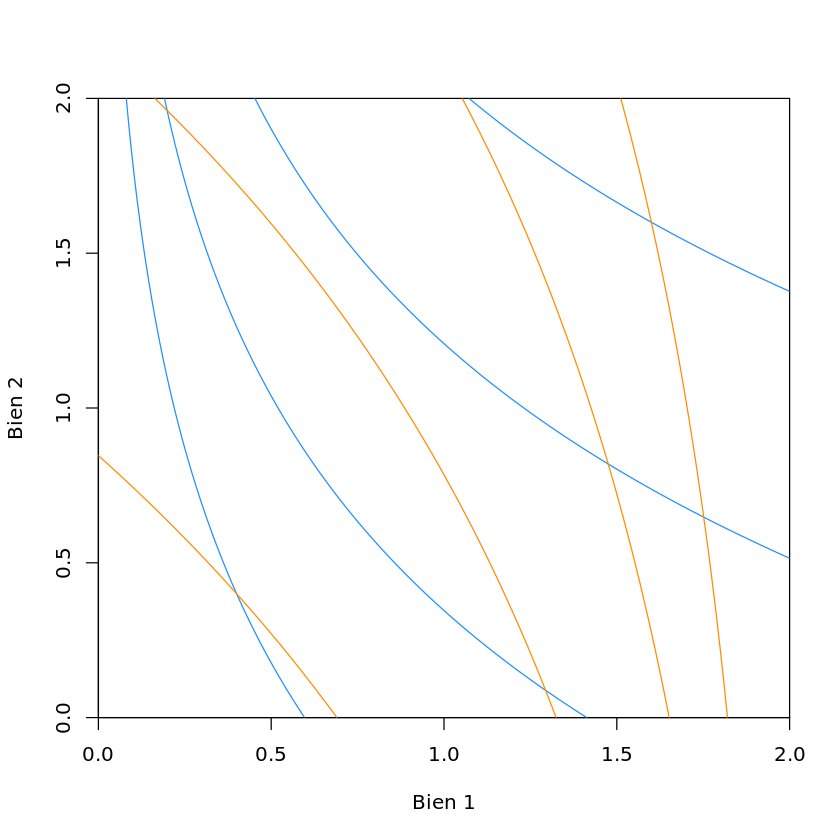

In [2]:
x1 <- seq(0, omega1, length=1000)

indiffA <- function(U) U - log(x1)
indiffB <- function(U) U - 2*log(x1)

niveauxA <- seq(UA(omega1/5, omega2/5), UA(4*omega1/5, 4*omega2/5), len = 4)
niveauxB <- seq(UB(omega1/5, omega2/5), UB(4*omega1/5, 4*omega2/5), len = 4)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", xlab = "Bien 1", ylab = "Bien 2", xaxs = "i", yaxs = "i")
for (U in niveauxA) lines(x1, indiffA(U), col = "dodgerblue", ylim = c(0, omega2))                # CI de A
for (U in niveauxB) lines(x1, rev(omega2 - indiffB(U)), col = "darkorange", ylim = c(0, omega2))  # CI de B

Premièrement, rappelons les optima de Pareto dans ce cas (voir TD1, exercice 2). Les optima internes vérifient

\begin{equation}
    x_1^A = \frac{\omega_1}{3}, \quad x_1^B = \frac{2\omega_1}{3}, \quad x_2^A + x_2^B = \omega_2
\end{equation}

et correspondent à un segment vertical dans la boîte d'Edgeworth. Les optima en coin sont de la forme

\begin{equation}
    x_1^A < \frac{\omega_1}{3}, \quad x_1^B = \omega_1 - x_1^A, \quad x_2^A = 0, \quad x_2^B = \omega_2
\end{equation}

pour le segment horizontal en bas de la boîte ; ou de la forme

\begin{equation}
    x_1^A > \frac{\omega_1}{3}, \quad x_1^B = \omega_1 - x_1^A, \quad x_2^A = \omega_2, \quad x_2^B = 0
\end{equation}

pour le segment horizontal en haut.

Je représente la courbe des optima ci-dessous dans la boîte d'Edgeworth (en violet).

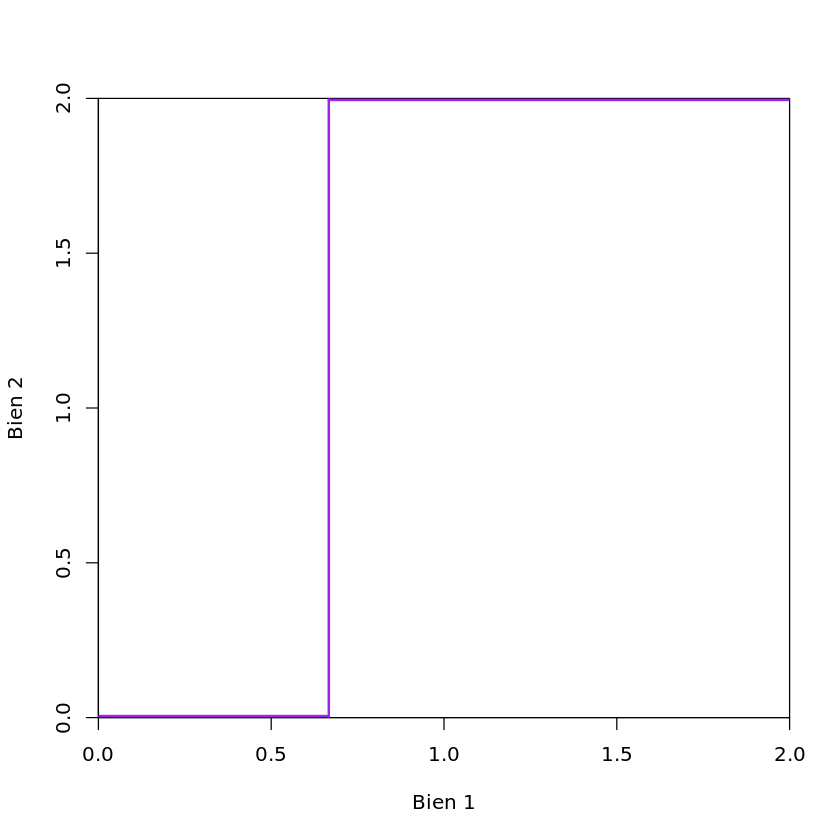

In [3]:
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")            # optima internes
lines(c(0, omega1/3), c(0, 0)+.005, lwd = 2, col = "purple")                   # optima en coin : xA2 = 0
lines(c(omega1/3, omega1), c(omega2, omega2)-.005, lwd = 2, col = "purple")    # optima en coin : xB2 = 0

On cherche maintenant l'équilibre concurrentiel de cette économie. On traite ici **tous les cas** (même quand l'équilibre est en coin).

**1. Fonctions de demande**



qui nous fournit immédiatement la demande en bien 1 _tant que cette demande est possible_. En effet, $A$ peut demander cette quantité de bien 1 tant qu'elle rentre dans sa contrainte budgétaire, c'est-à-dire tant que $p_1 \frac{p_2}{p_1} = p_2 \leq p \cdot \omega^A$. Si à l'inverse $p_2 > p \cdot \omega^A$ on a une solution en coin : $A$ n'a pas les moyens de demander $x_1^A = \frac{p_2}{p_1}$. Dans ce cas, il est préférable pour $A$ de dépenser toute sa richesse en bien 1 (1€ dépensé en bien 2 lui rapporte l'utilité marginale $\frac{1}{p_2}$, tandis que 1€ dépensé en bien 1 lui rapporte l'utilité marginale $\frac{1}{p_1} \frac{1}{x_1^A} > p_2$ pour $x_1^A < \frac{p_2}{p_1}$).

La demande de $A$ est donc

\begin{equation}
    \boxed{ x_1^A(p) = \begin{cases}
        \frac{p_2}{p_1} \; &\text{si $p_2 \leq p \cdot \omega^A$} \\
        \frac{p \cdot \omega^A}{p_1} \; &\text{si $p_2 > p \cdot \omega^A$}
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^A(p) = \begin{cases}
        \frac{p \cdot \omega^A - p_2}{p_2} \; &\text{si $p_2 \leq p \cdot \omega^A$} \\
        0 \; &\text{si $p_2 > p \cdot \omega^A$}
        \end{cases} }.
\end{equation}

L'agent $A$ demande donc toujours la même quantité de bien 1 (tant qu'il en a les moyens) et dépense tout le reste de sa richesse en bien 2.

Pour $B$, on trouve de façon similaire

\begin{equation}
    \boxed{ x_1^B(p) = \begin{cases}
        \frac{2 p_2}{p_1} \; &\text{si $2 p_2 \leq p \cdot \omega^B$} \\
        \frac{p \cdot \omega^B}{p_1} \; &\text{si $2 p_2 > p \cdot \omega^B$}
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^B(p) = \begin{cases}
        \frac{p \cdot \omega^B - 2p_2}{p_2} \; &\text{si $2 p_2 \leq p \cdot \omega^B$} \\
        0 \; &\text{si $2 p_2 > p \cdot \omega^B$}
        \end{cases} }.
\end{equation}



Avec ces fonctions d'utilité (voir TD2, exercice 2) :

\begin{equation}
    \boxed{ x_1^A(p) = \begin{cases}
        \frac{p_2}{p_1} \; &\text{si $p_2 \leq p \cdot \omega^A$} \\
        \frac{p \cdot \omega^A}{p_1} \; &\text{si $p_2 > p \cdot \omega^A$}
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^A(p) = \begin{cases}
        \frac{p \cdot \omega^A - p_2}{p_2} \; &\text{si $p_2 \leq p \cdot \omega^A$} \\
        0 \; &\text{si $p_2 > p \cdot \omega^A$}
        \end{cases} }.
\end{equation}

et

\begin{equation}
    \boxed{ x_1^B(p) = \begin{cases}
        \frac{2 p_2}{p_1} \; &\text{si $2 p_2 \leq p \cdot \omega^B$} \\
        \frac{p \cdot \omega^B}{p_1} \; &\text{si $2 p_2 > p \cdot \omega^B$}
        \end{cases} }
    \quad \text{et} \quad
    \boxed{ x_2^B(p) = \begin{cases}
        \frac{p \cdot \omega^B - 2p_2}{p_2} \; &\text{si $2 p_2 \leq p \cdot \omega^B$} \\
        0 \; &\text{si $2 p_2 > p \cdot \omega^B$}
        \end{cases} }.
\end{equation}


**2. Équilibre du marché de bien 1**

À l'équilibre concurrentiel le marché du bien 1 doit être équilibré : $x_1^A(p) + x_1^B(p) = \omega_1$. Nous avons différentes expressions pour les demandes selon les valeurs de $p$, $\omega^A$, et $\omega^B$, donc il faut distinguer les cas. 


**Cas 1.** Si $p_2 \leq p \cdot \omega^A$ et $2 p_2 \leq p \cdot \omega^B$, alors l'équilibre du marché du bien 1 s'écrit

\begin{equation}
    \frac{p_2}{p_1} + \frac{2p_2}{p_1} = \omega_1 \iff \frac{p_1}{p_2} = \frac{3}{\omega_1}.
\end{equation}

Ce rapport de prix constitue un équilibre tant que les demandes qu'il engendre sont positives (c'est-à-dire tant que les hypothèses sur les prix faites au début du paragraphe, $p_2 \leq p \cdot \omega^A$ et $2 p_2 \leq p \cdot \omega^B$, sont vérifiées). Il est facile de voir que c'est bien le cas avec les allocations $\omega^A = \omega^B = (1,1)$ qui ont été choisies ici. En effet, l'application numérique donne

\begin{equation}
    \boxed{
    \frac{p_1}{p_2} = \frac{3}{19}
    \qquad
    x_1^A = \frac{19}{3}
    \qquad
    x_2^A = \frac{105}{19}
    \qquad
    x_1^B = \frac{38}{3}
    \qquad
    x_2^B = \frac{85}{19}
    }.
\end{equation}


Mais selon les valeurs de $\omega^A$ et $\omega^B$, il y a potentiellement trois autres cas avec équilibres en coin. Notez que cela va **au-delà du programme de cette classe**.


**Cas 2.** Si $p_2 > p \cdot \omega^A$ et $2 p_2 \leq p \cdot \omega^B$, alors l'équilibre du marché 1 s'écrit

\begin{equation}
    \frac{p \cdot \omega^A}{p_1} + \frac{2p_2}{p_1} = \omega_1 \iff \frac{p_1}{p_2} = \frac{\omega_2^A + 2}{\omega_1^B}.
\end{equation}

Pour que ce rapport des prix corresponde en effet à un équilibre, il faut qu'il vérifie les deux hypothèses faites en début de paragraphe. En prenant par exemple $p_1 = \omega_2^A + 2$ et $p_2 = \omega_1^B$, ces hypothèses peuvent se réécrire

\begin{aligned}
    p_2 > p \cdot \omega^A &\iff \frac{3}{\omega_1} \omega_1^A + \omega_2^A < 1 = \frac{3}{\omega_1} \frac{\omega_1}{3} \\
    2 p_2 \leq p \cdot \omega^B &\iff \omega_2 \omega_1^B \geq 0.
\end{aligned}

La deuxième hypothèse est donc toujours vérifiée à ce rapport des prix (quelles que soient les allocations initiales $\omega^A$ et $\omega^B$). La première hypothèse, en revanche, est vérifiée si et seulement si $A$ n'a pas les moyens d'acheter $x_1^A = \frac{\omega_1}{3}$ au taux d'échange $\frac{p_1}{p_2} = \frac{3}{\omega_1}$, c'est-à-dire si $A$ n'a pas assez de ressources pour atteindre l'équilibre du cas 1. Cela correspond donc au **coin inférieur gauche** de la boîte d'Edgeworth.


**Cas 3.** Si $p_2 \leq p \cdot \omega^A$ et $2 p_2 > p \cdot \omega^B$, alors l'équilibre du marché 1 s'écrit

\begin{equation}
    \frac{p_2}{p_1} + \frac{p \cdot \omega^B}{p_1} = \omega_1 \iff \frac{p_1}{p_2} = \frac{\omega_2^B + 1}{\omega_1^A}.
\end{equation}

Il faut de nouveau vérifier que ce rapport des prix correspond bien à un équilibre en vérifiant les deux hypothèses faites en début de paragraphe. En prenant par exemple $p_1 = \omega_2^B + 1$ et $p_2 = \omega_1^A$, ces hypothèses peuvent se réécrire

\begin{aligned}
    p_2 \leq p \cdot \omega^A &\iff \omega_2 \omega_1^A \geq 0 \\
    2 p_2 > p \cdot \omega^B &\iff \frac{3}{\omega_1} \omega_1^B + \omega_2^B < 2 = \frac{3}{\omega_1} \frac{2 \omega_1}{3}.
\end{aligned}

Cette fois c'est la première hypothèse qui est toujours vérifiée (quelles que soient les allocations initiales $\omega^A$ et $\omega^B$), tandis que la deuxième hypothèse est vérifiée si et seulement si $B$ n'a pas les moyens d'acheter $x_1^B = \frac{2\omega_1}{3}$ au taux d'échange $\frac{p_1}{p_2} = \frac{3}{\omega_1}$, c'est-à-dire si $B$ n'a pas assez de ressources pour atteindre l'équilibre du cas 1. Cela correspond donc au **coin supérieur droit** de la boîte d'Edgeworth.


**Cas 4.** Si $p_2 > p \cdot \omega^A$ et $2 p_2 > p \cdot \omega^B$, alors l'équilibre _du marché 2_ (plus simple) s'écrit

\begin{equation}
    0 + 0 = \omega_2 \Rightarrow \text{impossible}.
\end{equation}

Il n'y a donc pas d'équilibre dans ce cas.


**En résumé,** nous avons trois types d'équilibre possible :

- Si $\frac{3}{\omega_1} \omega_1^A + \omega_2^A \geq 1$ et $\frac{3}{\omega_1} \omega_1^B + \omega_2^B \geq 2$ (i.e. $A$ et $B$ ont assez de ressources pour atteindre un optimum interne avec $\frac{p_1}{p_2} = \frac{3}{\omega_1}$),

\begin{equation}
    \boxed{\frac{p_1}{p_2} = \frac{3}{\omega_1}},
    \qquad
    x_1^A = \frac{\omega_1}{3},
    \qquad
    x_2^A = \frac{3}{\omega_1} \omega_1^A + \omega_2^A - 1,
    \qquad
    x_1^B = \frac{2 \omega_1}{3},
    \qquad
    x_2^B = \frac{3}{\omega_1} \omega_1^B + \omega_2^B - 2.
\end{equation}


- Si $\frac{3}{\omega_1} \omega_1^A + \omega_2^A < 1$  (i.e. quand $A$ n'a pas assez de ressources),

\begin{equation}
    \boxed{\frac{p_1}{p_2} = \frac{\omega_2^A + 2}{\omega_1^B}},
    \qquad
    x_1^A = \omega_1^A + \frac{\omega_2^A}{\omega_2^A + 2} \omega_1^B,
    \qquad
    x_2^A = 0,
    \qquad
    x_1^B = \frac{2 \omega_1^B}{\omega_2^A + 2},
    \qquad
    x_2^B = \omega_2.
\end{equation}

- Si $\frac{3}{\omega_1} \omega_1^B + \omega_2^B < 2$ (i.e. quand $B$ n'a pas assez de ressources),

\begin{equation}
    \boxed{\frac{p_1}{p_2} = \frac{\omega_2^B + 1}{\omega_1^A}},
    \qquad
    x_1^A = \frac{\omega_1^A}{\omega_2^B + 1},
    \qquad
    x_2^A = \omega_2,
    \qquad
    x_1^B = \omega_1^B + \frac{\omega_2^B}{\omega_2^B + 1} \omega_1^A,
    \qquad
    x_2^B = 0.
\end{equation}

Représentons maintenant l'équilibre dans la boîte d'Edgeworth. Je distingue les trois cas pour lesquels nous avons trouvé des équilibres en utilisant `if (<condition>)`. Pour chaque cas, je définis en premier lieu les demandes de chaque agent face à un vecteur de prix `p`, puis le rapport des prix à l'équilibre `r` selon les formules trouvées ci-dessus (la fonction `crossprod` correspond au produit scalaire).

In [4]:
# Cas 1 : par défaut

x1A <- function(p) p[2]/p[1]
x2A <- function(p) (crossprod(p, omegaA) - p[2])/p[2]
x1B <- function(p) 2*p[2]/p[1]
x2B <- function(p) (crossprod(p, omegaB) - 2*p[2])/p[2]
r <- 3/omega1

# Cas 2 : redéfinition des demandes et prix d'équilibre si besoin

if (3/omega1*omegaA[1] + omegaA[2] < 1) {
    x1A <- function(p) crossprod(p, omegaA)/p[1]
    x2A <- function(p) 0
    x1B <- function(p) 2*p[2]/p[1]
    x2B <- function(p) (crossprod(p, omegaB) - 2*p[2])/p[2]
    r <- (omegaA[2] + 2)/omegaB[1]
}

# Cas 3 : redéfinition des demandes et prix d'équilibre si besoin

if (3/omega1*omegaB[1] + omegaB[2] < 2) {
    x1A <- function(p) p[2]/p[1]
    x2A <- function(p) (crossprod(p, omegaA) - p[2])/p[2]
    x1B <- function(p) crossprod(p, omegaB)/p[1]
    x2B <- function(p) 0
    r <- (omegaB[2] + 1)/omegaA[1]
}

Je définis l'allocation $I$ de départ, ainsi que l'allocation d'équilibre $E$ (j'utilise $p_1 =$ `r` et $p_2 = 1$).

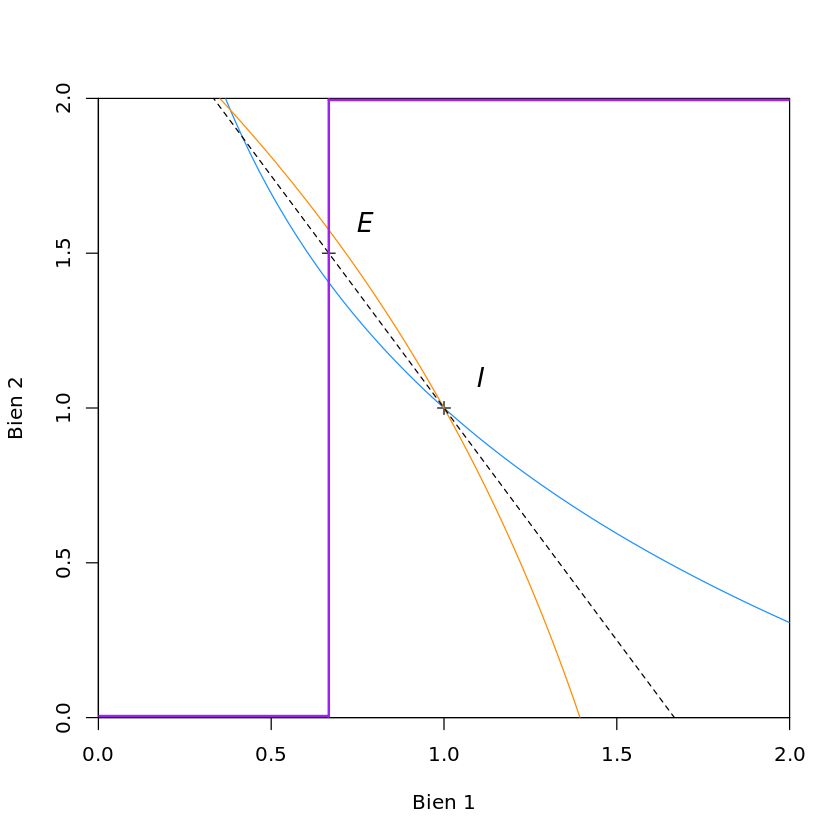

In [5]:
I <- omegaA                                   # dotations initiales
E <- c(x1A(c(r, 1)), x2A(c(r, 1)))            # équilibre concurrentiel

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
points(I[1], I[2], pch = 3)                                                    # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
lines(x1, indiffA(UA(I[1], I[2])), col = "dodgerblue", ylim = c(0, omega2))    # indifférence de A
lines(x1, rev(omega2 - indiffB(UB(omega1 - I[1], omega2 - I[2]))), col = "darkorange", ylim = c(0, omega2)) # ind. B
lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                             # contrainte de budget à l'équilibre
points(E[1], E[2], pch=3)                                                      # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)

lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")            # optima internes
lines(c(0, omega1/3), c(0, 0)+.005, lwd = 2, col = "purple")                   # optima en coin : xA2 = 0
lines(c(omega1/3, omega1), c(omega2, omega2)-.005, lwd = 2, col = "purple")    # optima en coin : xB2 = 0

Maintenant, représentons l'ensemble des droites de budget d'équilibre (optima toujours en violet).

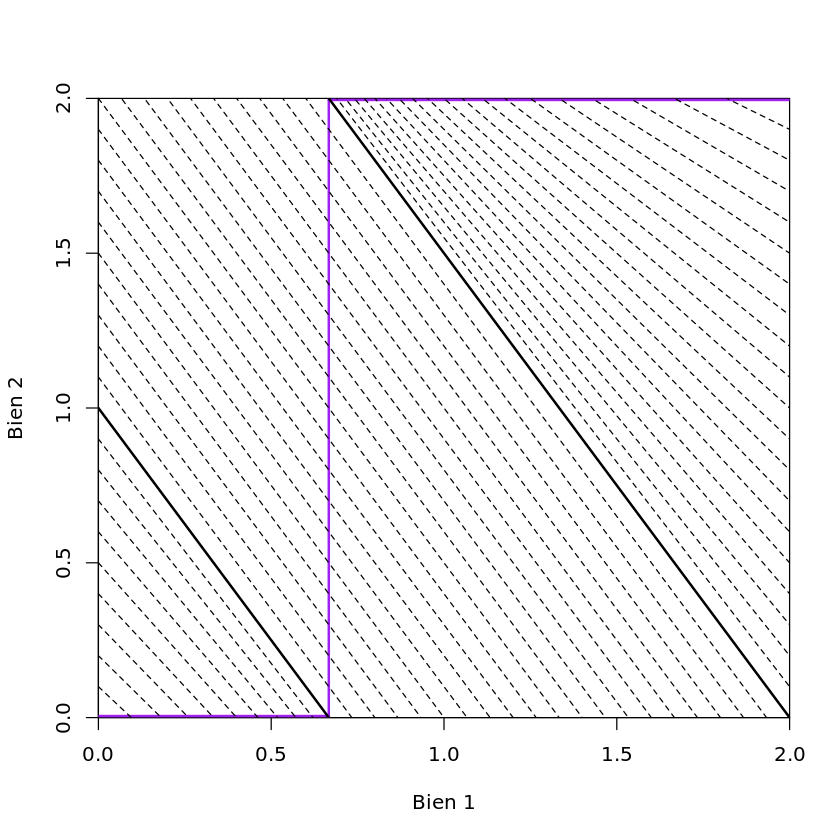

In [6]:
plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")            # optima internes
lines(c(0, omega1/3), c(0, 0)+.005, lwd = 2, col = "purple")                   # optima en coin : xA2 = 0
lines(c(omega1/3, omega1), c(omega2, omega2)-.005, lwd = 2, col = "purple")    # optima en coin : xB2 = 0

lines(x1, 1 - 3/omega1*x1, lwd=2)
lines(x1, omega2 - 2 + (3/omega1)*(omega1-x1), lwd=2)

for (omegaA2 in seq(1, 1+omega2, by=.1)) lines(x1, omegaA2 - 3/omega1*x1, lty=2)
for (omegaA2 in seq(0, 1, by=.1)) lines(x1, omegaA2 - ((2 + omegaA2)/omega1)*x1, lty=2)
for (omegaB2 in seq(0, 2, by=.1)) lines(x1, omega2 - omegaB2 + ((1+omegaB2)/omega1)*(omega1-x1), lty=2)

En trait plein noir, j'ai tracé les cas limites où $A$ et $B$ ont tout juste les moyens d'atteindre un équilibre interne avec des prix $\frac{p_1}{p_2} = \frac{3}{\omega_1}$. Entre ces deux droites de budget (cas 1), toutes les droites de budget d'équilibre sont **parallèles** (c'est normal puisque le taux d'échange d'équilibre est toujours le même, $\frac{p_1}{p_2} = \frac{3}{\omega_1}$).

Dans les coins on peut voir que ce n'est plus le cas. En effet, dans le coin inférieur gauche (cas 2) on observe que le ratio des prix d'équilibre (la pente des droites) diminue quand $A$ a de moins en moins de ressources. C'est cohérent avec le taux d'échange d'équilibre trouvé dans ce cas, $\frac{p_1}{p_2} = \frac{\omega_2^A + 2}{\omega_1^B}$.

Dans le coin supérieur droit (cas 3) le ratio des prix d'équilibre diminue quand $B$ a de moins en moins de ressources. C'est aussi cohérent avec le taux d'échange d'équilibre trouvé dans ce cas, $\frac{p_1}{p_2} = \frac{\omega_2^B + 1}{\omega_1^A}$.

Maintenant regardons comment implémenter l'allocation optimale $X = (\frac{2}{3}, \frac{1}{2} ; \frac{4}{3}, \frac{3}{2})$. On trouve la droite de budget d'équilibre qui passe par $X$ (en rouge).

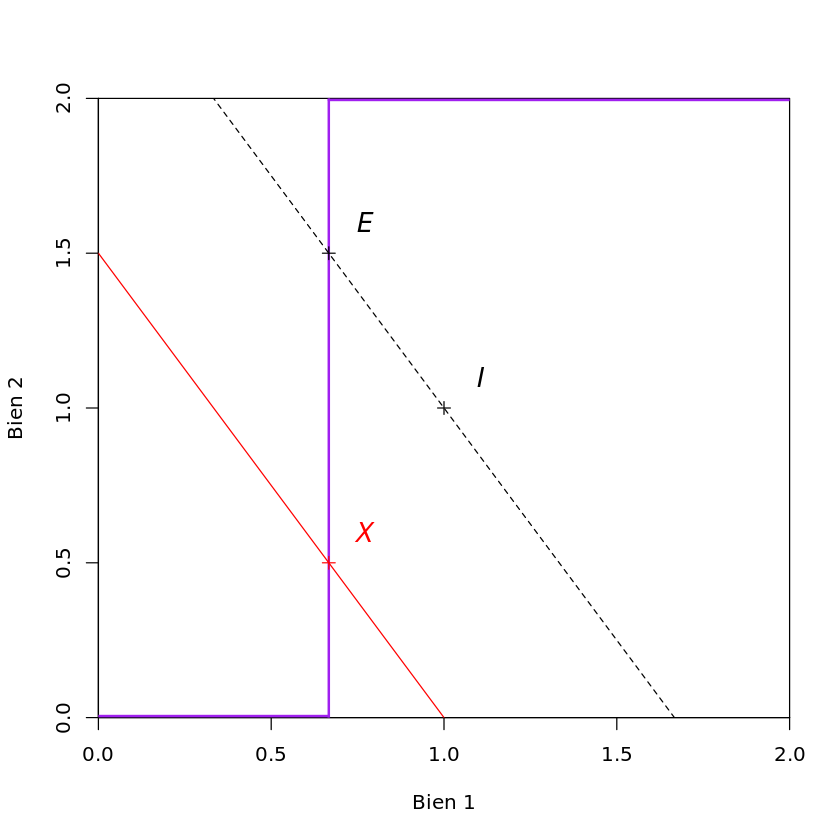

In [20]:
X <- c(1/3*omega1, 1/4*omega2)

plot(x = x1, y = x1, xlim = c(0, omega1), ylim = c(0, omega2),
     type = "n", asp=NA, xlab="Bien 1", ylab="Bien 2", xaxs="i", yaxs="i")
lines(c(omega1/3, omega1/3), c(0, omega2), lwd = 2, col = "purple")            # optima internes
lines(c(0, omega1/3), c(0, 0)+.005, lwd = 2, col = "purple")                   # optima en coin : xA2 = 0
lines(c(omega1/3, omega1), c(omega2, omega2)-.005, lwd = 2, col = "purple")    # optima en coin : xB2 = 0

points(I[1], I[2], pch = 3)                                                    # allocation initiale I
    text(I[1]+.05*omega1, I[2]+.05*omega2, labels = "I", cex = 1.3, font = 3)
points(E[1], E[2], pch=3)                                                      # équilibre concurrentiel E
    text(E[1]+.05*omega1, E[2]+.05*omega2, labels = "E", cex = 1.3, font = 3)
points(X[1], X[2], pch = 3, col= "red")                                        # allocation visée X
    text(X[1]+.05*omega1, X[2]+.05*omega2, labels = "X", cex = 1.3, font = 3, col = "red")

lines(x1, r*omegaA[1] + omegaA[2] - r*x1, lty = 2)                             # contrainte de budget à E

rX <- 3/omega1
if (3/omega1*X[1] + X[2] < 1) rX <- (X[2] + 2)/(omega1 - X[1])
if (3/omega1*(omega1 - X[1]) + (omega2 - X[2]) < 2) rX <- (omega2 - X[2] + 1)/X[1]

lines(x1, rX*X[1] + X[2] - rX*x1, col = "red")                                # contrainte de budget à X

Pour implémenter l'allocation $X$ on peut :

- Soit faire un transfert de dotation $t^A = (t_1^A, t_2^A)$, $t^B = - t^A$ de telle sorte que la nouvelle allocation soit sur la droite rouge, le plus simple étant tel que $\omega_1^A + t_1^A = x_1^A$ et $\omega_2^A + t_2^A = x_2^A$ (avec cet exemple ces transferts seront négatifs, on prend des ressources à $A$ pour aller de $I$ vers $X$),


- Soit faire un transfert forfaitaire $T^A$, $T^B = -T^A$ qui amène les agents sur la droite de budget d'équilibre visée (sans préciser les quantités de chaque bien qui sont prélevées), i.e. tel que $p_E \cdot \omega^A + T^A = p_X \cdot \omega^A$, où $p_E$ est un vecteur de prix d'équilibre à $E$ et $p_X$ est un vecteur de prix d'équilibre à $X$. Ici on aura aussi $T^A < 0$ et $T^B > 0$.